In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.var()

C:\Users\risha\AppData\Local\Temp\ipykernel_4536\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df = df.drop(['Cabin'], axis = 1)

In [10]:
df['Age'].fillna(value = df['Age'].mean().round(0), inplace=True)

In [11]:
df = df.dropna(subset=['Embarked'])

In [12]:
drop_cols = ['PassengerId', 'Ticket', 'Name']
df.drop(drop_cols, axis = 1, inplace = True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


C:\Users\risha\AppData\Local\Temp\ipykernel_4536\3048952738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

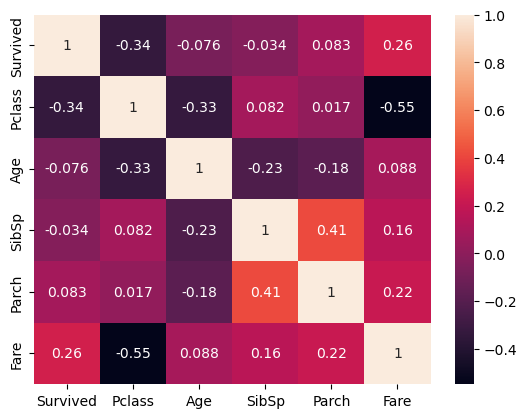

In [14]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [15]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

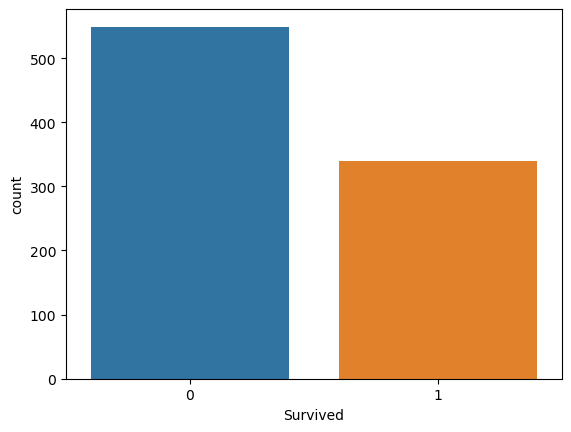

In [16]:
sns.countplot(x = 'Survived', data = df)
plt.show()

In [17]:
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

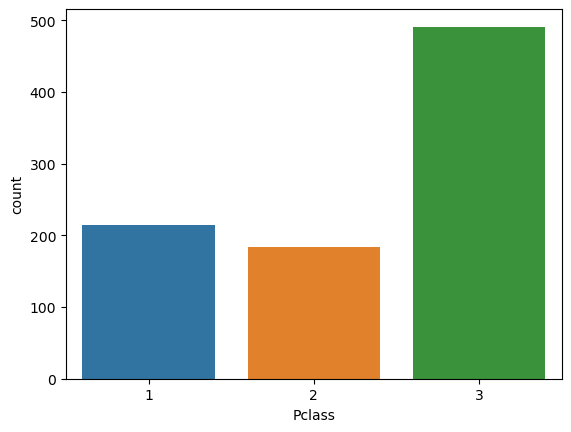

In [18]:
sns.countplot(x = 'Pclass', data = df)
plt.show()

In [19]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

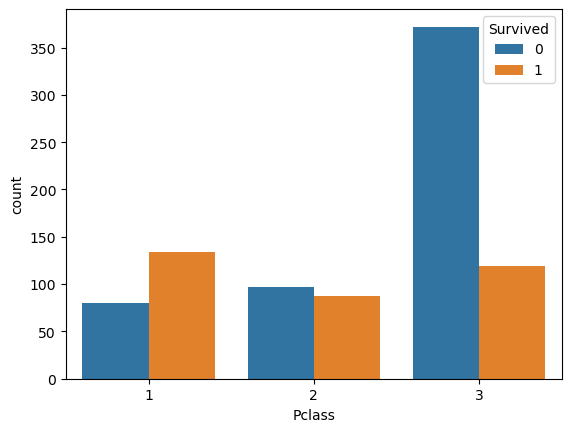

In [20]:
sns.countplot(x='Pclass', hue = 'Survived', data = df)
plt.show()

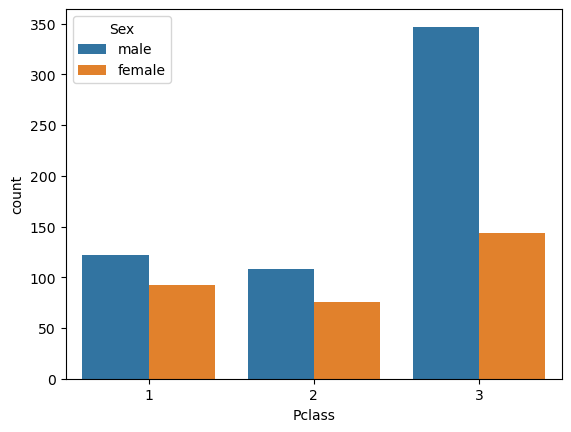

In [21]:
sns.countplot(x='Pclass', hue = 'Sex', data = df)
plt.show()

In [22]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

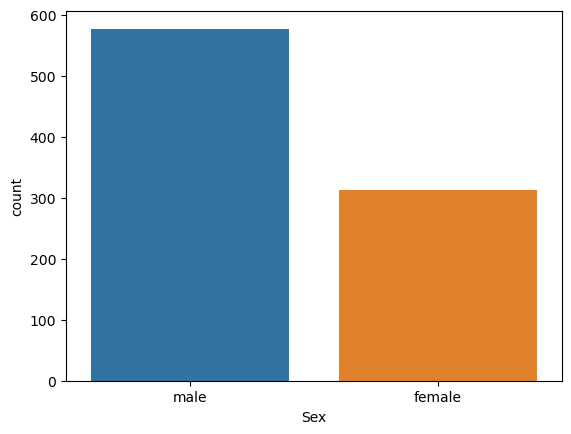

In [23]:
sns.countplot(x = 'Sex', data = df)
plt.show()

In [24]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

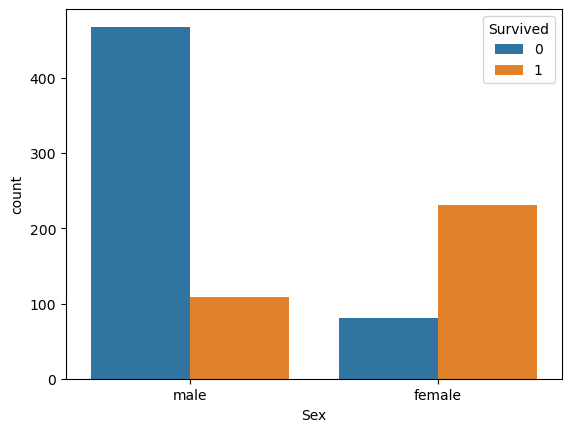

In [25]:
sns.countplot(x='Sex', hue = 'Survived', data = df)
plt.show()

C:\Users\risha\AppData\Local\Temp\ipykernel_4536\1599895865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


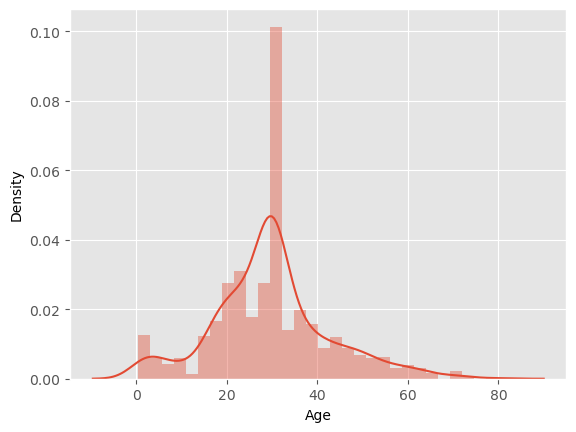

In [185]:
sns.distplot(df['Age'])
plt.show()

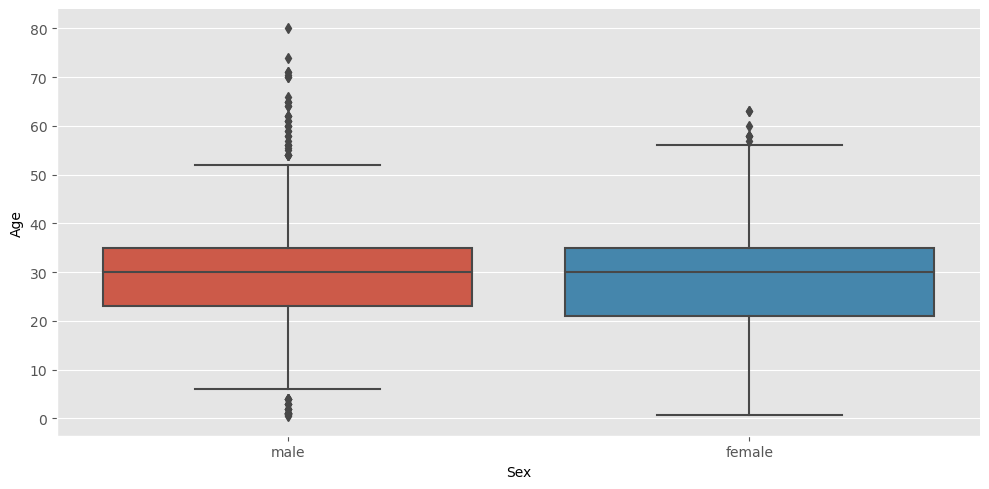

In [33]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = df, height = 5, aspect = 2)
plt.show()

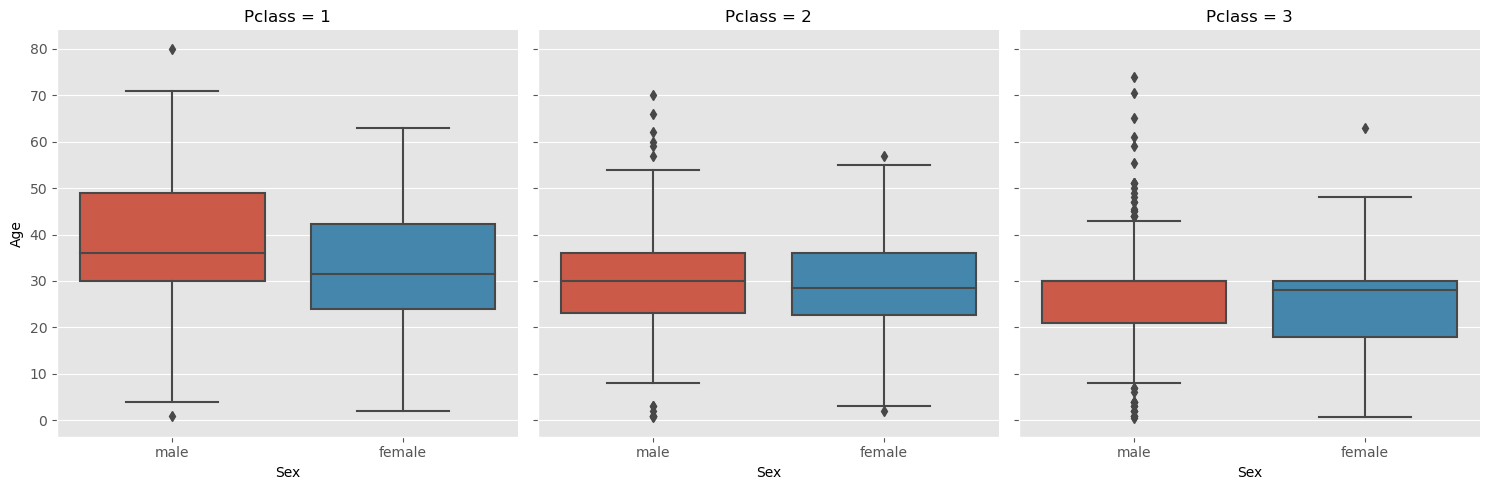

In [34]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = df, col = 'Pclass')
plt.show()

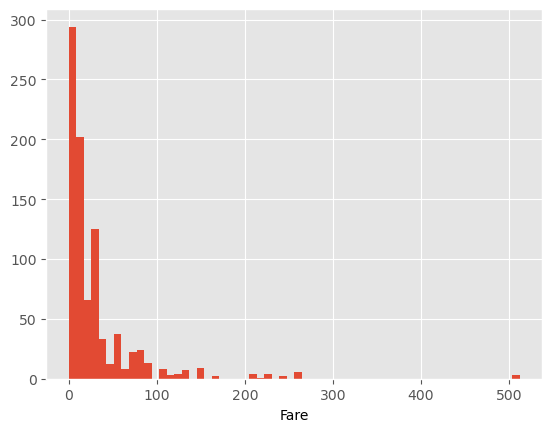

In [35]:
plt.hist(df.Fare, bins = 60)
plt.xlabel('Fare')
plt.show()

In [36]:
df['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

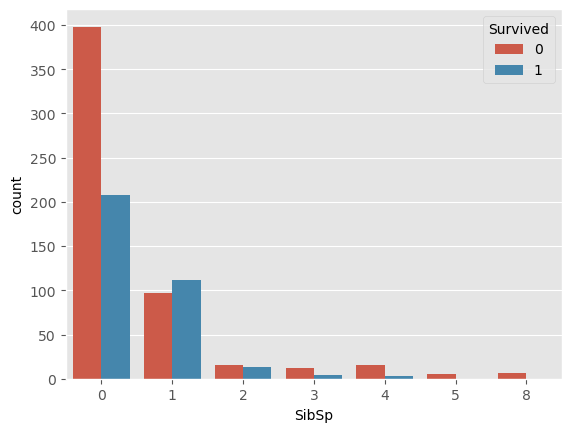

In [37]:
sns.countplot(x = 'SibSp', data = df, hue = 'Survived')
plt.show()

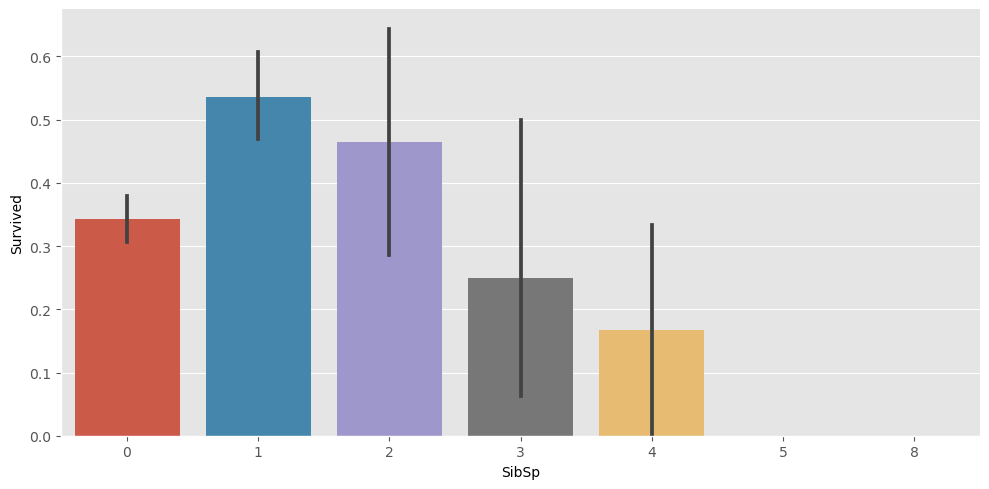

In [38]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', data = df, height = 5, aspect =2)
plt.show()

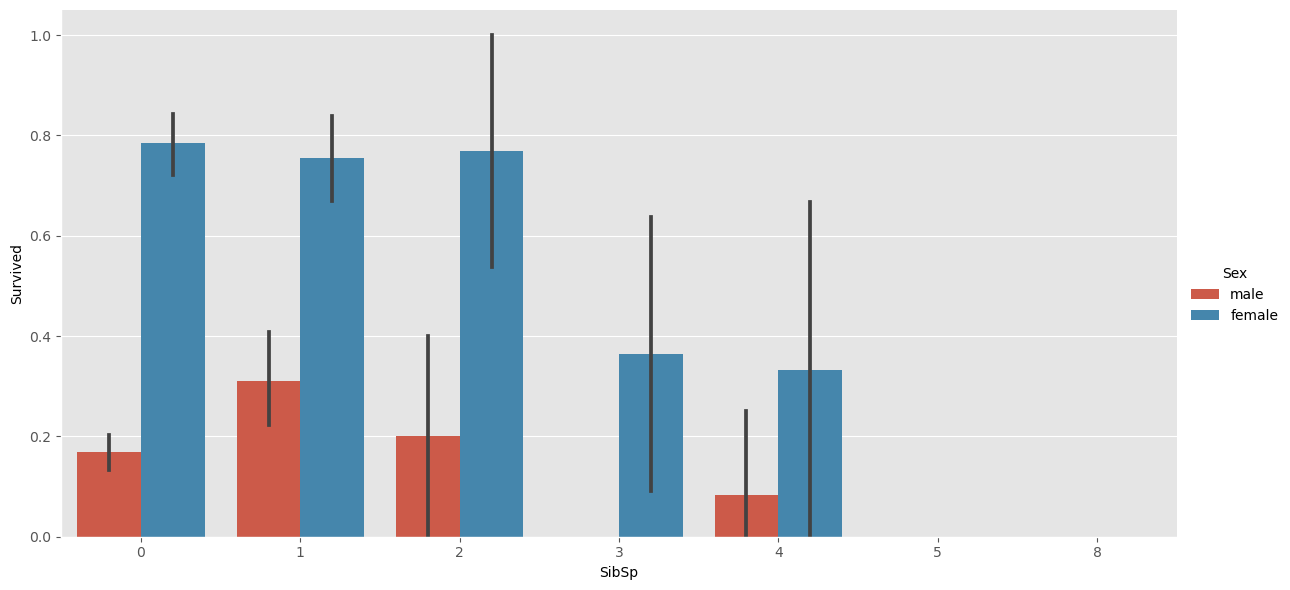

In [39]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = df, height = 6, aspect = 2)
plt.show()

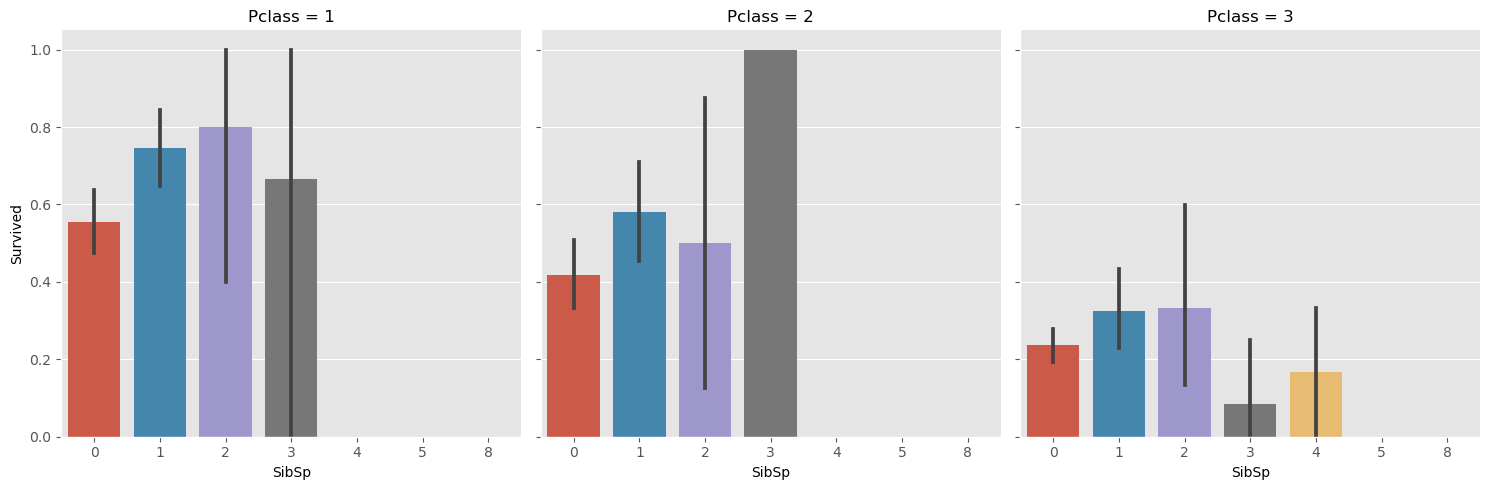

In [40]:
sns.catplot(x = 'SibSp', y = 'Survived', col = 'Pclass', kind = 'bar', data = df)
plt.show()

In [41]:
df.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

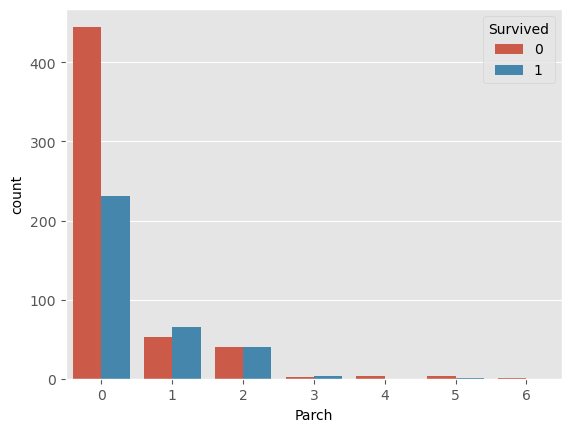

In [42]:
sns.countplot(x = 'Parch', data = df, hue = 'Survived')
plt.show()

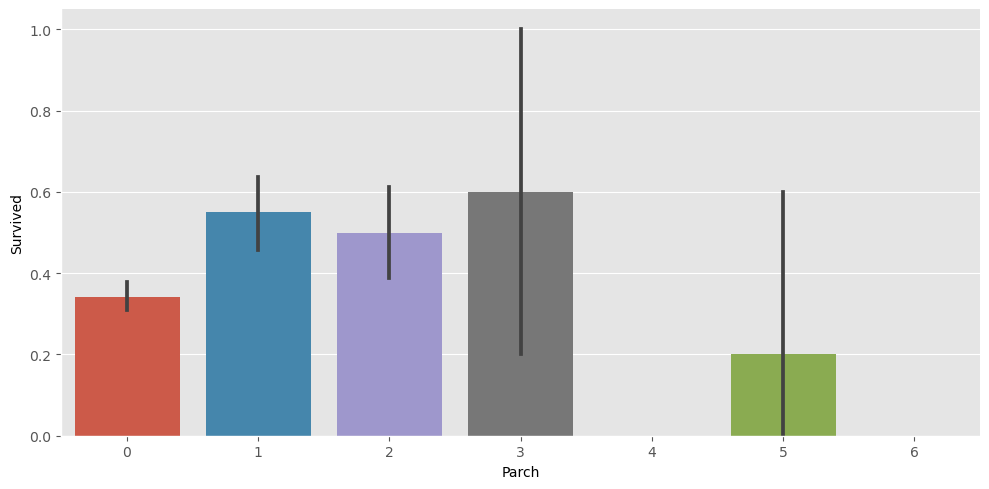

In [43]:
sns.catplot(x = 'Parch', y = 'Survived', kind = 'bar', data = df, height = 5, aspect =2)
plt.show()

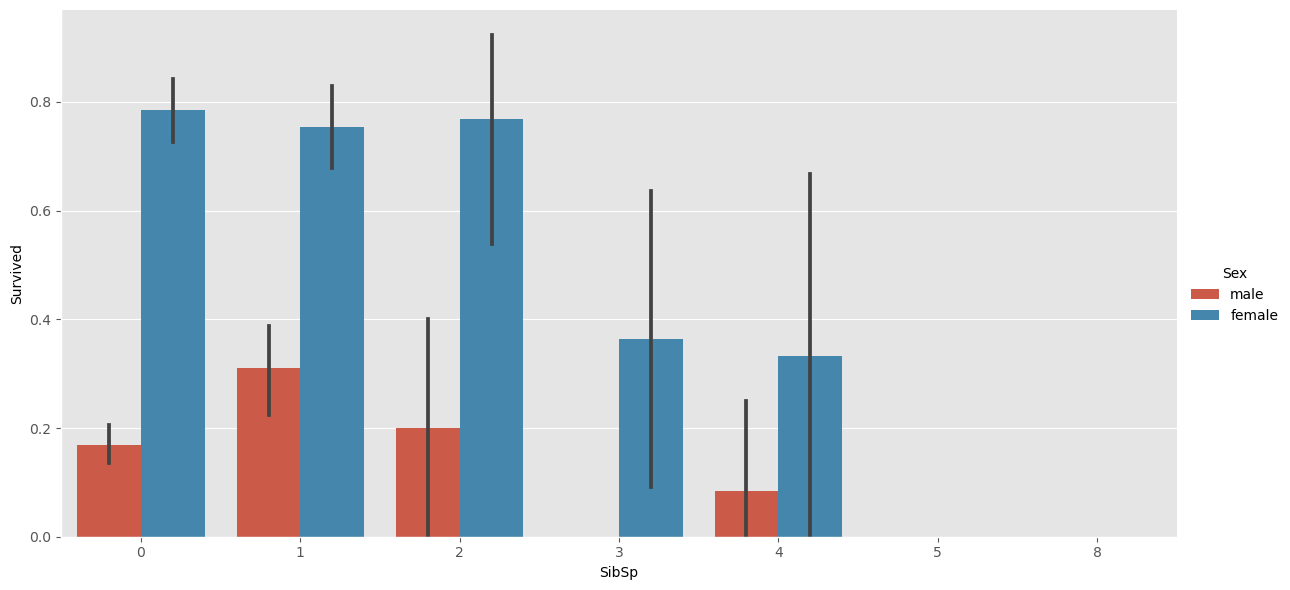

In [44]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = df, height = 6, aspect = 2)
plt.show()

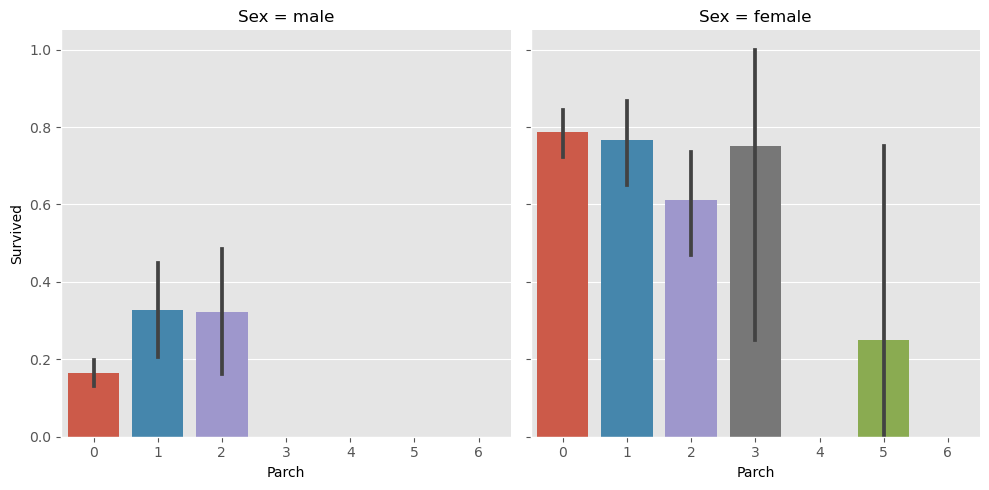

In [45]:
sns.catplot(x = 'Parch',  y = 'Survived', kind = 'bar', col = 'Sex', data = df)
plt.show()

In [46]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

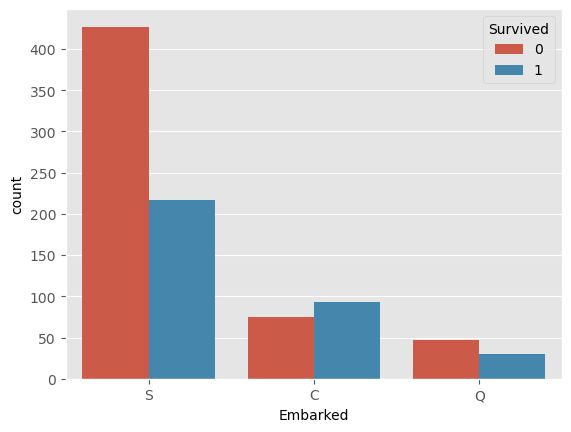

In [47]:
sns.countplot(x='Embarked', hue = 'Survived', data = df)
plt.show()

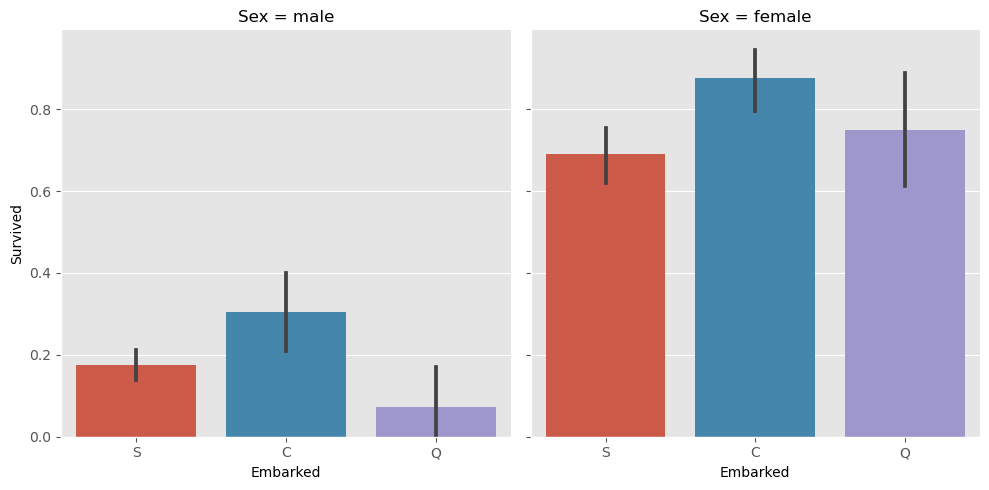

In [48]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = df, col = 'Sex')
plt.show()

In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [50]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [52]:
df.var()

Survived       0.236448
Pclass         0.696724
Sex            0.228042
Age          168.198455
SibSp          1.218164
Parch          0.650863
Fare        2469.841935
Embarked       0.404696
dtype: float64

In [167]:
df_test = pd.read_csv('test.csv')

In [168]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [169]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [170]:
test_survival_df = pd.read_csv('gender_submission.csv') 
test_survival_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [171]:
df_test_final = pd.concat([df_test , test_survival_df['Survived']] , axis = 1)
df_test_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [172]:
df_test_final.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [173]:
df_test_final['Age'].fillna(value = df_test_final['Age'].mean().round(0), inplace=True)

In [174]:
df_test_final = df_test_final.dropna(subset=['Fare'])

In [175]:
df_test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1


In [176]:
df_test_final.var()

C:\Users\risha\AppData\Local\Temp\ipykernel_4536\1952752985.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_final.var()


Pclass         0.709094
Age          157.817554
SibSp          0.805629
Parch          0.965147
Fare        3125.657074
Survived       0.232199
dtype: float64

In [177]:
df_test_final['Sex'] = df_test_final['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df_test_final['Embarked'] = df_test_final['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [178]:
df_test_final

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,2,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,2,0
3,3,1,27.0,0,0,8.6625,0,0
4,3,0,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,0,0
414,1,0,39.0,0,0,108.9000,1,1
415,3,1,38.5,0,0,7.2500,0,0
416,3,1,30.0,0,0,8.0500,0,0


In [179]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

# LOGISTIC REGRESSION

In [183]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, lr.predict(X_train)))

print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

0.8247588424437299
[[252  13]
 [ 16 136]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       265
           1       0.91      0.89      0.90       152

    accuracy                           0.93       417
   macro avg       0.93      0.92      0.92       417
weighted avg       0.93      0.93      0.93       417



C:\Users\risha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [184]:
X_test = df_test_final.drop('Survived' , axis = 1)
y_test = df_test_final['Survived']

y_predict = lr.predict(X_test)

print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9304556354916067
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       265
           1       0.91      0.89      0.90       152

    accuracy                           0.93       417
   macro avg       0.93      0.92      0.92       417
weighted avg       0.93      0.93      0.93       417

